-	Import libraries you have commonly used such as pandas, numpy, and matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist


2024-11-07 12:38:48.163477: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


-	Download and load any dataset of your choice from Kaggle (Digit or Fashion MNIST) and display the file structure.

- Load the dataset and display the first five rows.

In [3]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

print(f"Train feature shape: {train_features.shape}")
print(f"Test feature shape: {test_features.shape}")

Train feature shape: (60000, 28, 28)
Test feature shape: (10000, 28, 28)


In [4]:
print("First few rows of the train features: \n", train_features[:5])
print("First few rows of the label data: \n", test_labels[:5])

First few rows of the train features: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
First few rows of the label data: 
 [7 2 1 0 4]


-	Explore the dataset's shape and structure, and identify the number of samples and features.

-	Extract the label column from the training data and explore its unique values.

In [5]:
print("Training dataset shape: ", train_features.shape)
print("Testing dataset shape: ", test_features.shape)

print("Number of training data: ", train_features.shape[0])
print("Image dimensions: ", test_features.shape[1:])


Training dataset shape:  (60000, 28, 28)
Testing dataset shape:  (10000, 28, 28)
Number of training data:  60000
Image dimensions:  (28, 28)


-	Extract the label column from the test data and explore its unique values.

In [6]:
print("Unique labels in training data: ", np.unique(train_labels))
print("Unique labels in test labels: ", np.unique(test_labels))


Unique labels in training data:  [0 1 2 3 4 5 6 7 8 9]
Unique labels in test labels:  [0 1 2 3 4 5 6 7 8 9]


-	Separate the features and labels from the training and test sets.

In [7]:
X_train, y_train = train_features, train_labels
X_test, y_test = test_features, test_labels

-	Normalize the feature values of the dataset to range between 0 and 1.

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

•	Reshape the features to display the image.

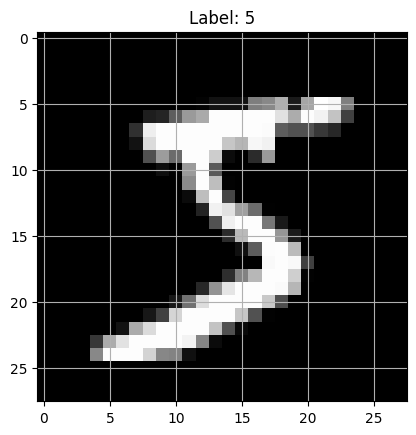

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.grid()
plt.show()

•	Display the memory usage of the dataset before and after normalization in Megabytes and check how much memory we saved.

In [10]:
def memory_usage(data):
    return data.nbytes / (1024 * 1024)

memory_before = memory_usage(train_features)
memory_after = memory_usage(X_train)

print(f"Memory before normalization: {memory_before:.2f}")
print(f"Memory after normalization: {memory_after:.2f}")
print(f"Memory saved: {memory_before - memory_after:.2f}")

Memory before normalization: 44.86
Memory after normalization: 358.89
Memory saved: -314.03


•	Count the instances of each label in the training dataset and visualize the count.

In [11]:
label_count = pd.Series(y_train).value_counts().sort_index()

/var/folders/j0/w_sc6_7n777fy7v8ytm1r08w0000gn/T/ipykernel_30595/319988427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_count.index, y=label_count.values, palette='viridis')


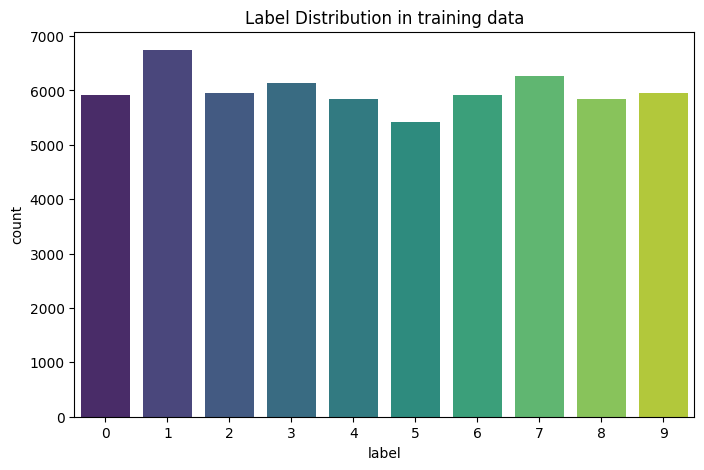

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=label_count.index, y=label_count.values, palette='viridis')
plt.title("Label Distribution in training data")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

In [13]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# 2.	Data Visualization

•	Select a random sample of 5 images from the training dataset and plot them with their labels.

In [14]:
import random
sampled_images = random.sample(list(X_train), 5)

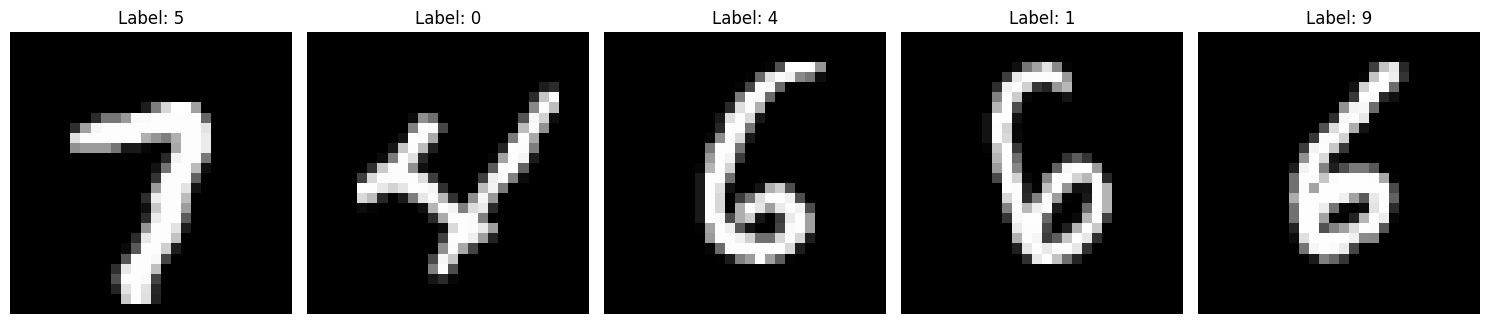

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))  # 2 rows, 5 columns

for i in range(5):
    ax = axes[i]  
    ax.imshow(sampled_images[i], cmap='gray')  
    ax.set_title(f"Label: {y_train[i]}") 
    ax.axis('off')

plt.tight_layout()
plt.show()

•	Use plt.imshow() to display a single Fashion or Digit MNIST item and customize the color map.

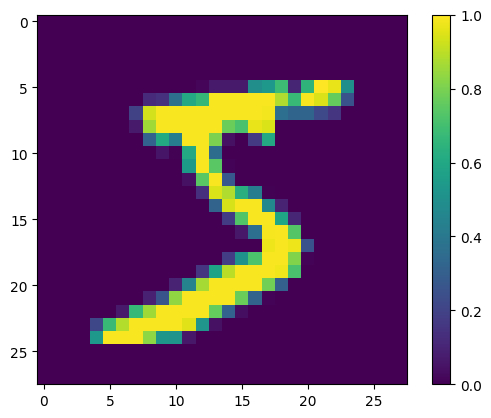

In [16]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0], cmap="viridis")  # Use a different colormap like 'viridis', 'magma', etc.
plt.colorbar()  # Optionally display a colorbar
plt.show()


•	Create a subplot to display 9 different images from the dataset in a 3x3 grid.

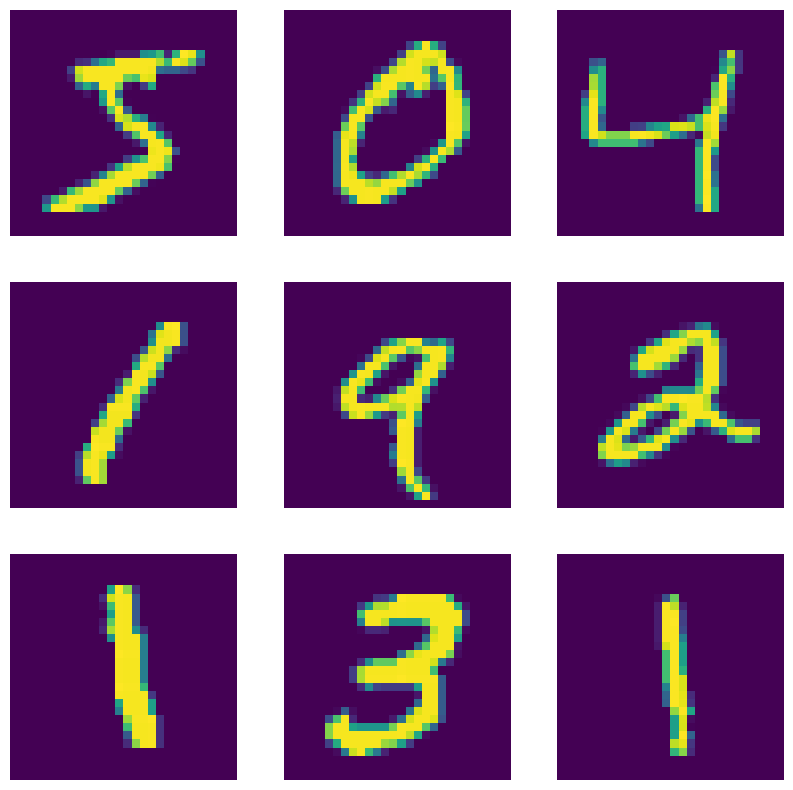

In [17]:
import matplotlib.pyplot as plt

num_images = 9
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(X_train[i])  # Assuming X_train contains the images
    plt.axis("off")
plt.show()

•	Visualize one image per class and label them with the respective class names.

In [18]:
uni = np.unique(train_labels)

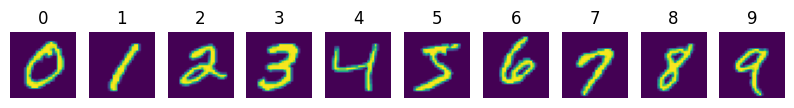

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'class_names' is a list of class names
num_classes = len(uni)

plt.figure(figsize=(10, 5))
for i in range(num_classes):
    image_index = np.where(y_train == i)[0][0]  # Find index in y_train
    plt.subplot(1, num_classes, i + 1)
    plt.imshow(X_train[image_index])  # Display image from X_train
    plt.title(uni[i])
    plt.axis("off")
plt.show()

# 3.	Data Augmentation Techniques

•	Perform horizontal flipping on an image from the dataset and display the original and augmented images.

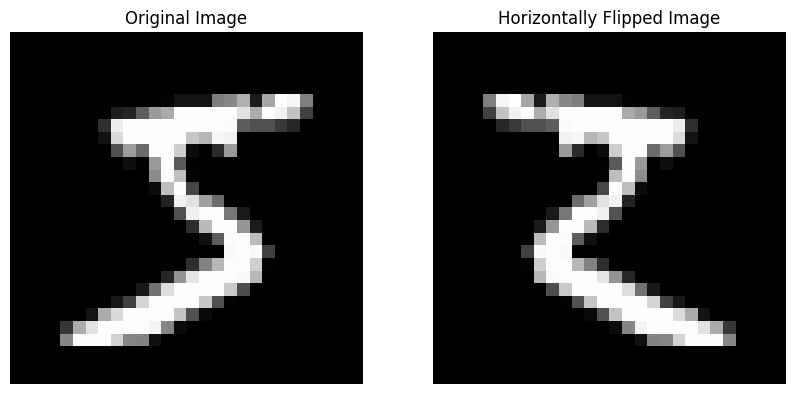

In [20]:
# Select an image from the dataset (e.g., X_train[0])
image = X_train[0]

flipped_image = np.fliplr(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray') 
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(flipped_image, cmap='gray')  
plt.title("Horizontally Flipped Image")
plt.axis("off")

plt.show()

•	Rotate an image by 60 degrees and display the result alongside the original image.

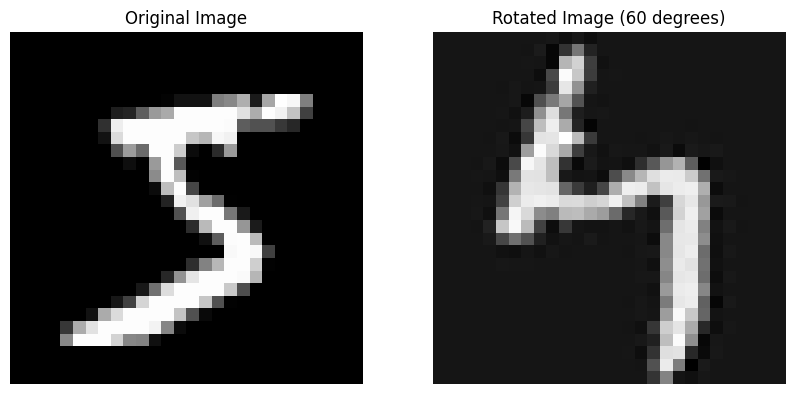

In [21]:
import matplotlib.pyplot as plt
from scipy import ndimage
image = X_train[0]
rotated_image = ndimage.rotate(image, 60, reshape=False) 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (60 degrees)")
plt.axis("off")

plt.show()

•	Use data augmentation to change the brightness of an image and visualize the outcome.

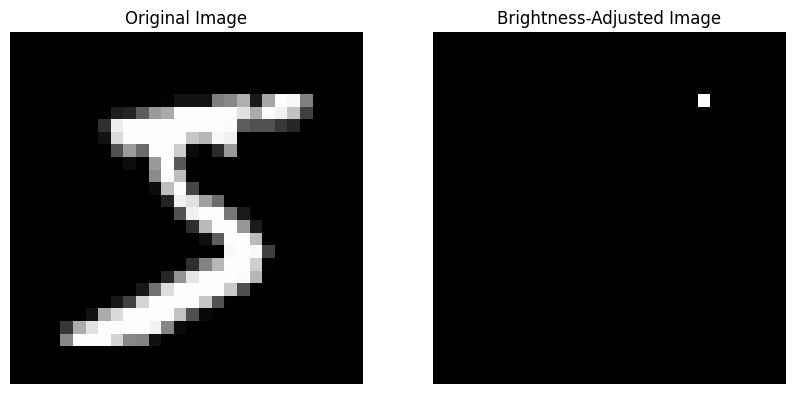

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Select an image from the dataset (e.g., X_train[0])
image = X_train[0]

# Reshape the image 
image = image.reshape((1,) + image.shape + (1,))

# Create ImageDataGenerator with brightness range
datagen = ImageDataGenerator(brightness_range=[0.5, 1.5])

# Generate augmented image
augmented_image = next(datagen.flow(image, batch_size=1))[0]

# Display original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], cmap='gray')  # Extract the image from the batch
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image[:, :, 0], cmap='gray')
plt.title("Brightness-Adjusted Image")
plt.axis("off")

plt.show()

In [29]:
datagen = ImageDataGenerator(
    rotation_range=[15, 30, 45],
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest' 
)